# Visão Computacional - Lista de Exercícios 1
Alunos:
- Luana Júlia Nunes Ferreira
- Lucas Mendes Massa

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Questão 1
A abordagem usada consiste em calcular a diferença absoluta entre as duas imagens transferidas para escala de cinza e encontrar uma máscara binária a partir dessa diferença para extrair o foreground 

In [3]:
img1 = cv2.imread('./first_frame.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

In [4]:
img2 = cv2.imread('./second_frame.jpg')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [5]:
img1.shape

(312, 500, 3)

In [6]:
img2_reshaped = cv2.resize(img2,(500,312))

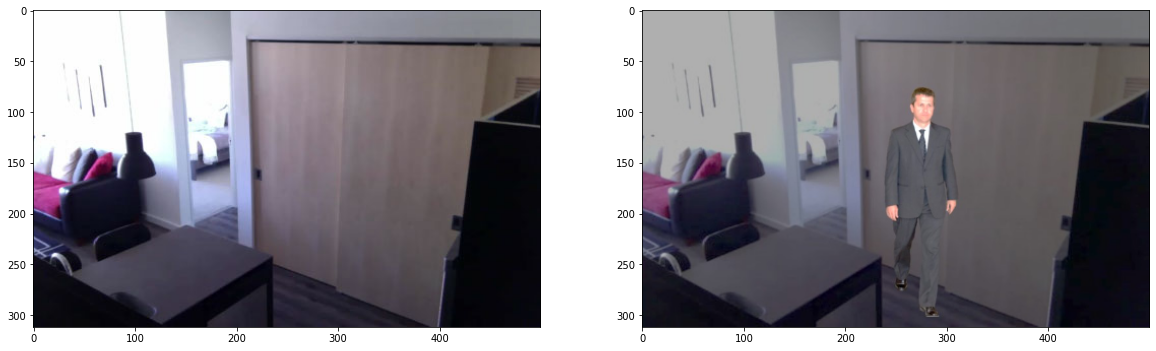

In [7]:
f, axarr = plt.subplots(1,2, figsize=(20,20))
axarr[0].imshow(img1,cmap='gray')
axarr[1].imshow(img2_reshaped,cmap='gray')

In [10]:

# gerando imagens em escala de cinza
img1_gray = cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
img2_gray = cv2.cvtColor(img2_reshaped,cv2.COLOR_RGB2GRAY)

# adicionando blur
kernel1 = np.ones((11,11),np.float32)/50
img1_gray = cv2.filter2D(img1_gray,-1,kernel1)

m1 = img1_gray.max()
m2 = img2_gray.max()

img1_gray = img1_gray/m1
img2_gray = img2_gray/m2

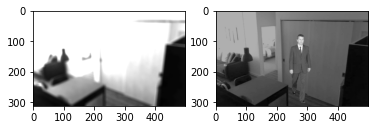

In [11]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(img1_gray,cmap='gray')
axarr[1].imshow(img2_gray,cmap='gray')

In [12]:
diff_img = cv2.absdiff(img1_gray,img2_gray)

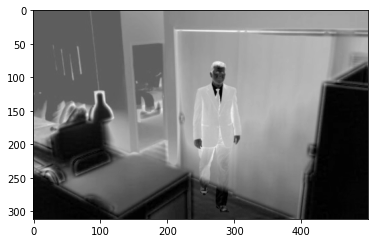

In [13]:
plt.imshow(diff_img, cmap='gray')

In [14]:
# obtendo uma mascara binaria para o foreground
threshold = 0.62
mask = np.zeros(312*500).reshape((312,500))

for i in range(diff_img.shape[0]):
    for j in range(diff_img.shape[1]):
        if diff_img[i,j]>=threshold:
            mask[i,j] = 1

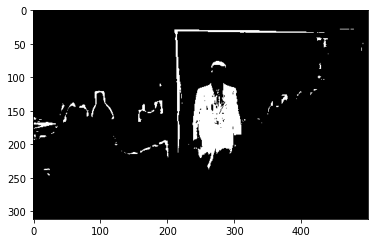

In [15]:
plt.imshow(mask,cmap='gray')

In [16]:
fore = np.zeros(3*312*500).reshape((312,500,3)).astype(int)

for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i,j] == 1:
            fore[i,j,:] = img2_reshaped[i,j,:]
            
kernel2 = np.ones((11,11),np.float32)/100
blured2 = cv2.filter2D(img2_reshaped,-1,kernel2)
            
res = np.zeros(3*312*500).reshape((312,500,3)).astype(int)

for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i,j] == 1:
            res[i,j,:] = fore[i,j,:]
        else:
            res[i,j,:] = blured2[i,j,:]

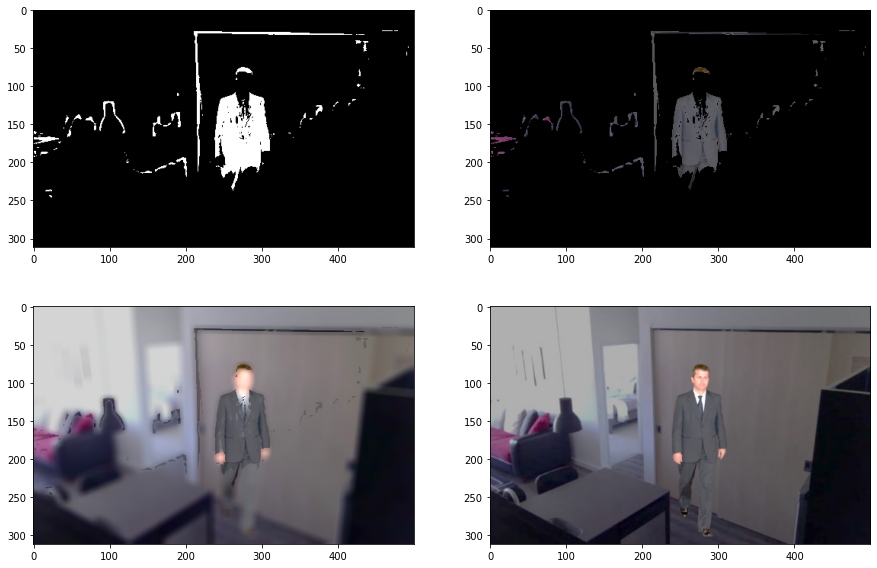

In [17]:
# plotando, respectivamente, a mascara binaria, o foreground obtido,
# a composição de foreground com a imagem 2 e a imagem 2 original. 
f, axarr = plt.subplots(2,2,figsize=(15,10))
axarr[0,0].imshow(mask,cmap='gray')
axarr[0,1].imshow(fore,cmap='gray')
axarr[1,0].imshow(res,cmap='gray')
axarr[1,1].imshow(img2_reshaped,cmap='gray')

# Questão 2 - TIRAR DÚVIDA

In [18]:
m = fore.max()
alpha = 0.6
s = cv2.GaussianBlur(fore/m,(9,9),3)
d = fore - s
newfore = fore + alpha*d
m = newfore.max()
newfore = newfore/m
#newfore = cv2.medianBlur(fore/m,9)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


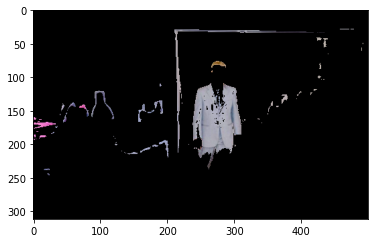

In [19]:
plt.imshow(newfore)

# Questão 3

In [20]:
def filtro2D(image,kernel,r,c,h,w,k):
    channel0 = []
    
    for x in range(k,image.shape[0]-k):
        new_row = []       
        for y in range(k,image.shape[1]-k):
            pixel = 0
            a = 0
            for u in range(-(k-1),k+1,1):
                b = 0
                for v in range(-(k-1),k+1,1):
                    pixel += image[(x-u),(y-v)]*kernel[a,b]
                    b+=1
                a+=1
            new_row.append(pixel)
        channel0.append(new_row)
        
    channel0 = np.array(channel0)
    result = np.zeros(channel0.shape[0]*channel0.shape[1]).reshape((channel0.shape[0],channel0.shape[1]))
    result[:,:] = channel0
    
    return result

In [21]:
def filtro3D(image,kernel,r,c,h,w,k):
    channel0 = []
    
    for x in range(k,image.shape[0]-k):
        new_row = []       
        for y in range(k,image.shape[1]-k):
            pixel = 0
            a = 0
            for u in range(-(k-1),k+1,1):
                b = 0
                for v in range(-(k-1),k+1,1):
                    pixel += image[(x-u),(y-v),0]*kernel[a,b]
                    b+=1
                a+=1
            new_row.append(pixel)
        channel0.append(new_row)
        
    channel1 = []
    
    for x in range(k,image.shape[0]-k):
        new_row = []       
        for y in range(k,image.shape[1]-k):            
            pixel = 0
            a = 0
            for u in range(-(k-1),k+1,1):
                b = 0
                for v in range(-(k-1),k+1,1):
                    pixel += image[(x-u),(y-v),1]*kernel[a,b]
                    b+=1
                a+=1
            new_row.append(pixel)
        channel1.append(new_row)
        
    channel2 = []
    
    for x in range(k,image.shape[0]-k):
        new_row = []       
        for y in range(k,image.shape[1]-k):            
            pixel = 0
            a = 0
            for u in range(-(k-1),k+1,1):
                b = 0
                for v in range(-(k-1),k+1,1):
                    pixel += image[(x-u),(y-v),2]*kernel[a,b]
                    b+=1
                a+=1
            new_row.append(pixel)
        channel2.append(new_row)
        
    channel0 = np.array(channel0)
    channel1 = np.array(channel1)
    channel2 = np.array(channel2)
        
    result = np.zeros(3*channel0.shape[0]*channel0.shape[1]).reshape((channel0.shape[0],channel0.shape[1],3))
    result[:,:,0] = channel0
    result[:,:,1] = channel1
    result[:,:,2] = channel2
    
    return result

In [22]:
# funcao para aplicar filtro em imagem RGB
def aplicarFiltro(image,kernel):
    r = kernel.shape[0]
    c = kernel.shape[1]
    h = image.shape[0]
    w = image.shape[1]
    
    if r != c:        
        print('Erro: O kernel passado não é uma matriz quadrada')
        return None
    
    if (r%2==0):
        print('Erro: O kernel passado possui número par de linhas e colunas')
        
    k = int((r-1)/2)
    
    if len(image.shape) == 2:
        result = filtro2D(image,kernel,r,c,h,w,k)
    else:
        result = filtro3D(image,kernel,r,c,h,w,k)
        
    return result

In [23]:
# filtro a ser aplicado
filtro = np.array([
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1]
]).astype(float)
filtro *= 1/20

In [24]:
small_img1 = cv2.resize(img1,(200,100))
small_img1_gray = cv2.cvtColor(small_img1,cv2.COLOR_RGB2GRAY)
filtered = aplicarFiltro(small_img1_gray,filtro)

In [25]:
filtered.shape

(96, 196)

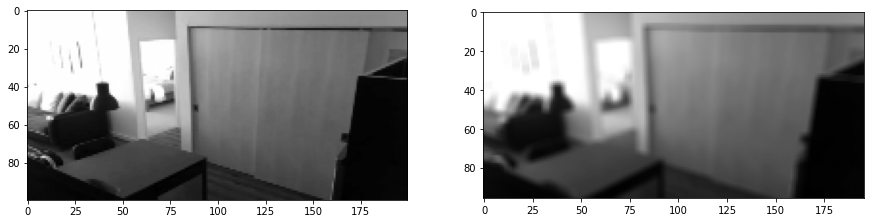

In [26]:
# imagem original e resultado da convolução, respectivamente
f, axarr = plt.subplots(1,2,figsize=(15,10))
axarr[0].imshow(small_img1_gray,cmap='gray')
axarr[1].imshow(filtered/255,cmap='gray')

# Questão 4

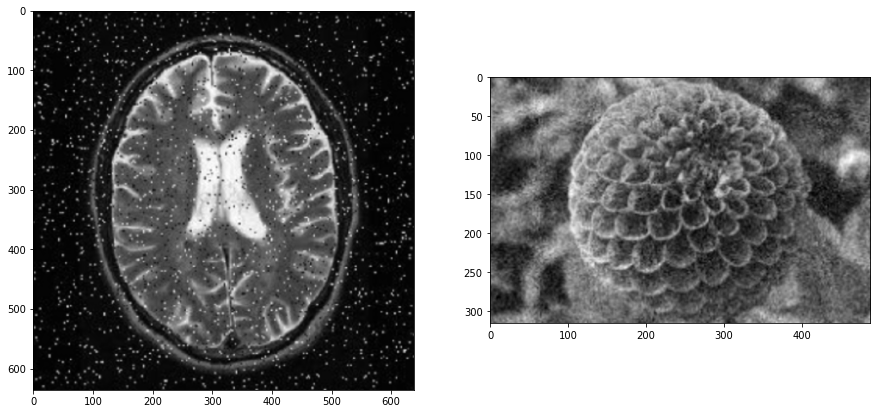

In [27]:
# carregando as imagens originais
noisy1 = cv2.imread('./noisy1.png')
noisy2 = cv2.imread('./noisy2.png')

noisy1 = cv2.cvtColor(noisy1,cv2.COLOR_BGR2GRAY)/255
noisy2 = cv2.cvtColor(noisy2,cv2.COLOR_BGR2GRAY)/255

percent = 200

noisy1 = cv2.resize(noisy1,(int(noisy1.shape[1] * percent / 100),int(noisy1.shape[0] * percent / 100)))
noisy2 = cv2.resize(noisy2,(int(noisy2.shape[1] * percent / 100),int(noisy2.shape[0] * percent / 100)))

f, axarr = plt.subplots(1,2,figsize=(15,10))
axarr[0].imshow(noisy1,cmap='gray')
axarr[1].imshow(noisy2,cmap='gray')

### Mean Filter
Fazendo uso das funções implementadas na questão 3.

In [28]:
def meanFilter2D(image,n):
    mean_kernel = np.ones(n*n).reshape((n,n))
    mean_kernel = (1/(n**2))*mean_kernel
    result = aplicarFiltro(image,mean_kernel) # usando função da questão 3
    return result

In [29]:
mean_noisy1 = meanFilter2D(noisy1,9)
mean_noisy2 = meanFilter2D(noisy2,9)

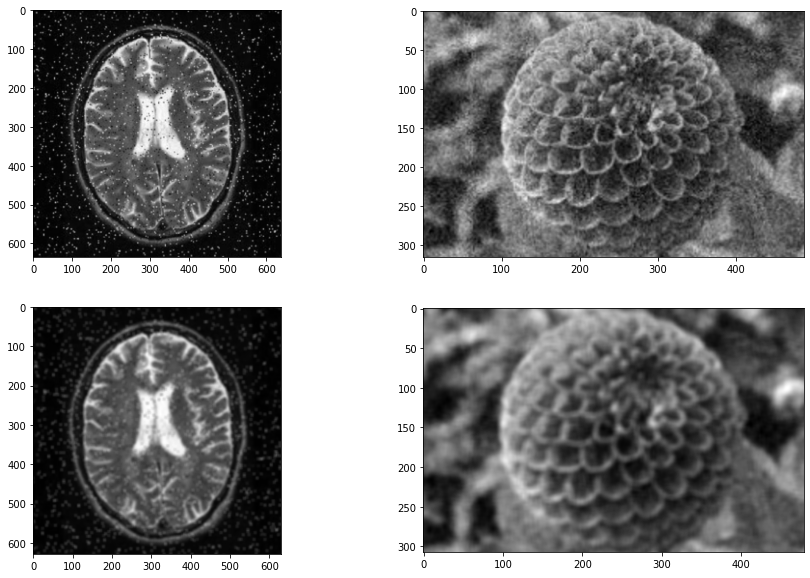

In [30]:
# plotando os resultados
# na coluna superior se encontram as imagens originais
# na coluna inferior se encontram as imagens filtradas

f, axarr = plt.subplots(2,2,figsize=(15,10))
axarr[0,0].imshow(noisy1,cmap='gray')
axarr[0,1].imshow(noisy2,cmap='gray')
axarr[1,0].imshow(mean_noisy1,cmap='gray')
axarr[1,1].imshow(mean_noisy2,cmap='gray')

### Median Filter

In [31]:
def medianFilter2D(image,n):
    h = image.shape[0]
    w = image.shape[1]
    
    if (n%2==0):
        print('Erro: O kernel passado possui número par de linhas e colunas')
        
    k = int((n-1)/2)
    
    channel0 = []
    
    for x in range(k,image.shape[0]-k):
        new_row = []       
        for y in range(k,image.shape[1]-k):
            current_window = image[x-(k+1):x+(k-1),y-(k+1):y+(k-1)]
            pixel = np.median(current_window)
            new_row.append(pixel)
        channel0.append(new_row)
        
    channel0 = np.array(channel0)
    result = np.zeros(channel0.shape[0]*channel0.shape[1]).reshape((channel0.shape[0],channel0.shape[1]))
    result[:,:] = channel0
    
    return result

In [32]:
median_noisy1 = medianFilter2D(noisy1,11)
median_noisy2 = medianFilter2D(noisy2,7)

/home/luana/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/luana/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


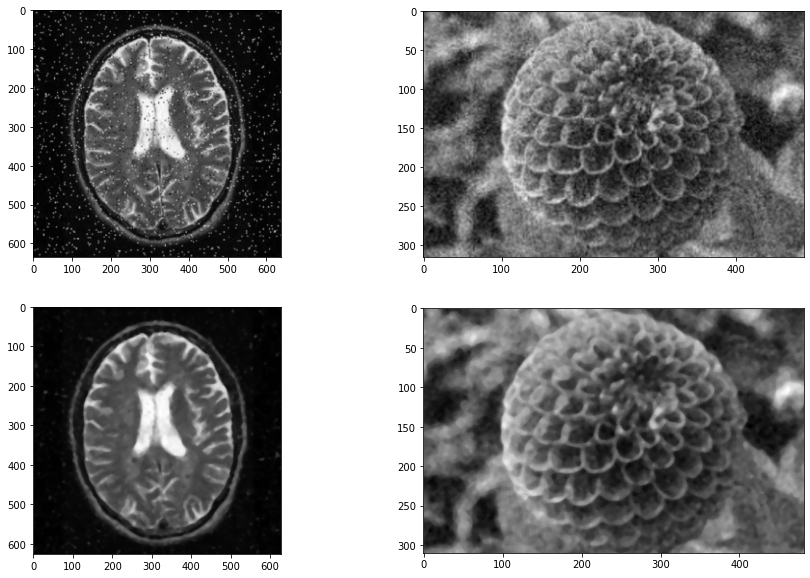

In [33]:
# plotando os resultados
# na coluna superior se encontram as imagens originais
# na coluna inferior se encontram as imagens filtradas

f, axarr = plt.subplots(2,2,figsize=(15,10))
axarr[0,0].imshow(noisy1,cmap='gray')
axarr[0,1].imshow(noisy2,cmap='gray')
axarr[1,0].imshow(median_noisy1,cmap='gray')
axarr[1,1].imshow(median_noisy2,cmap='gray')

# Questão 5
Aplicando extração de detalhes

In [34]:
cat = cv2.imread('./cat.jpg')
cat = cv2.cvtColor(cat,cv2.COLOR_BGR2GRAY)/255

car = cv2.imread('./car.png')
car = cv2.cvtColor(car,cv2.COLOR_BGR2GRAY)/255

dog = cv2.imread('./dog.png')
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2GRAY)/255

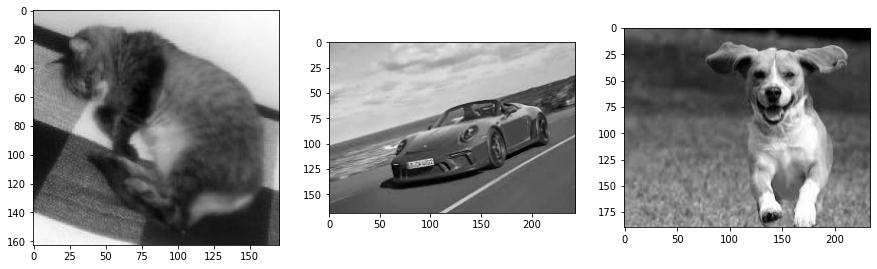

In [35]:
f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(cat,cmap='gray')
axarr[1].imshow(car,cmap='gray')
axarr[2].imshow(dog,cmap='gray')

Fazendo uso da função implementada na questão 4

In [36]:
def detailExtraction(image,n):
    image = image/255
    smooth = medianFilter2D(image,n) # função implementada na questão 4
    image = cv2.resize(image,(smooth.shape[1],smooth.shape[0]))
    result = image - smooth
    return result

### Aplicando n = 3

In [37]:
n3_sharp_cat = detailExtraction(cat,3)
n3_sharp_car = detailExtraction(car,3)
n3_sharp_dog = detailExtraction(dog,3)

/home/luana/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/luana/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


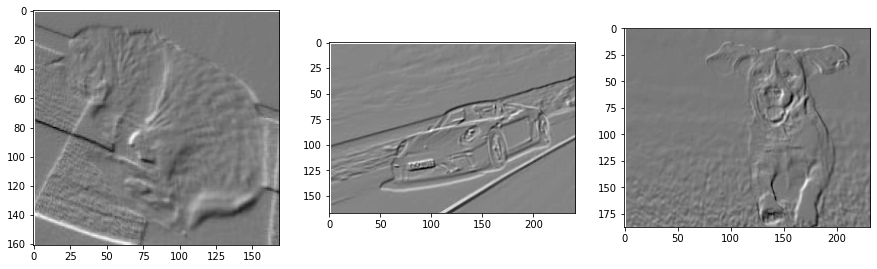

In [38]:
f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(n3_sharp_cat,cmap='gray')
axarr[1].imshow(n3_sharp_car,cmap='gray')
axarr[2].imshow(n3_sharp_dog,cmap='gray')

### Aplicando n = 7

In [39]:
n7_sharp_cat = detailExtraction(cat,7)
n7_sharp_car = detailExtraction(car,7)
n7_sharp_dog = detailExtraction(dog,7)

/home/luana/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/luana/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


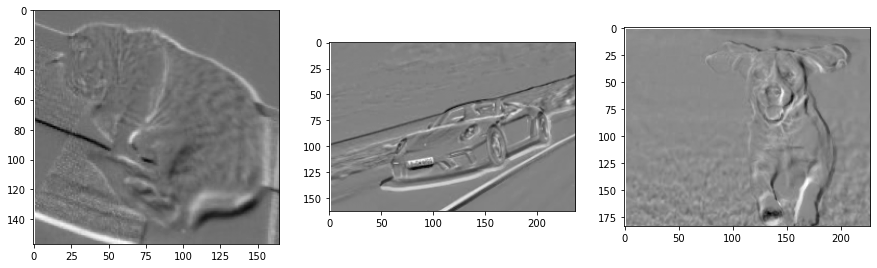

In [40]:
f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(n7_sharp_cat,cmap='gray')
axarr[1].imshow(n7_sharp_car,cmap='gray')
axarr[2].imshow(n7_sharp_dog,cmap='gray')

### Aplicando n = 11

In [41]:
n11_sharp_cat = detailExtraction(cat,11)
n11_sharp_car = detailExtraction(car,11)
n11_sharp_dog = detailExtraction(dog,11)

/home/luana/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/luana/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


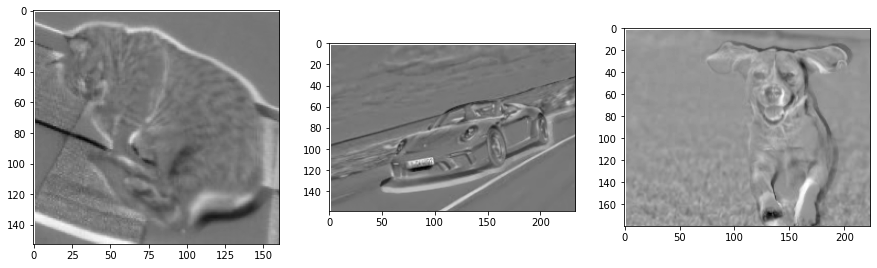

In [42]:
f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(n11_sharp_cat,cmap='gray')
axarr[1].imshow(n11_sharp_car,cmap='gray')
axarr[2].imshow(n11_sharp_dog,cmap='gray')

# Questão 6
Aplicando mean filter implementado na questão 4.

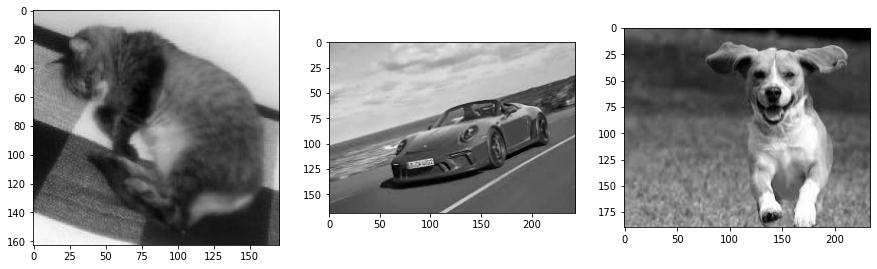

In [43]:
f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(cat,cmap='gray')
axarr[1].imshow(car,cmap='gray')
axarr[2].imshow(dog,cmap='gray')

### Aplicando para n = 3

In [44]:
n3_cat = meanFilter2D(cat,3)
n3_car = meanFilter2D(car,3)
n3_dog = meanFilter2D(dog,3)

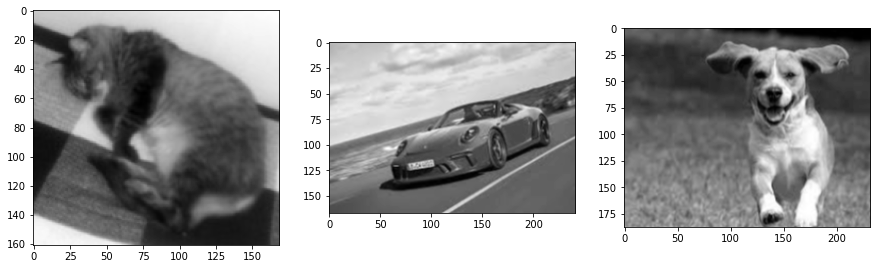

In [45]:
f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(n3_cat,cmap='gray')
axarr[1].imshow(n3_car,cmap='gray')
axarr[2].imshow(n3_dog,cmap='gray')

### Aplicando para n = 7

In [46]:
n7_cat = meanFilter2D(cat,7)
n7_car = meanFilter2D(car,7)
n7_dog = meanFilter2D(dog,7)

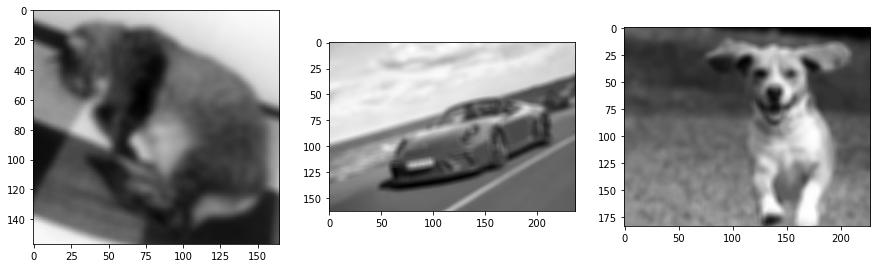

In [47]:
f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(n7_cat,cmap='gray')
axarr[1].imshow(n7_car,cmap='gray')
axarr[2].imshow(n7_dog,cmap='gray')

### Aplicando n = 11

In [48]:
n11_cat = meanFilter2D(cat,11)
n11_car = meanFilter2D(car,11)
n11_dog = meanFilter2D(dog,11)

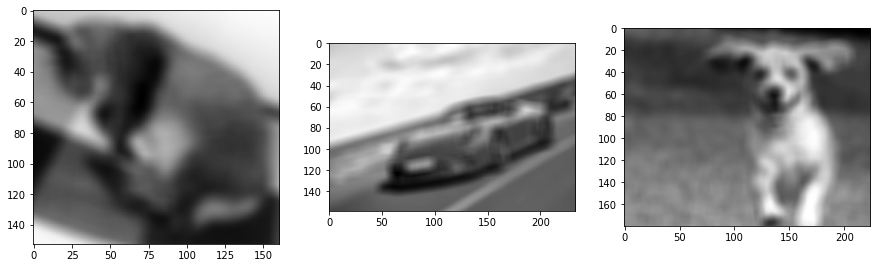

In [49]:
f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(n11_cat,cmap='gray')
axarr[1].imshow(n11_car,cmap='gray')
axarr[2].imshow(n11_dog,cmap='gray')

# Questão 7

In [ ]:
edge_n3_room = cv2.Canny()

# Questão 8 - TIRAR DÚVIDA

# Questão 9

In [50]:
g = np.array([
    [1/273,4/273,7/273,4/273,1/273],
    [4/273,16/273,26/273,16/273,4/273],
    [7/273,26/273,41/273,26/273,7/273],
    [4/273,16/273,26/273,16/273,4/273],
    [1/273,4/273,7/273,4/273,1/273]
])

In [51]:
I = np.zeros(100*100).reshape((100,100))
I[49,49] = 255

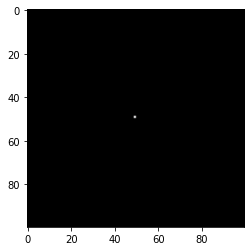

In [52]:
plt.imshow(I,cmap='gray')

### Aplicando convoluções

In [53]:
conv1 = cv2.filter2D(I,-1,g)
conv2 = cv2.filter2D(g,-1,I)

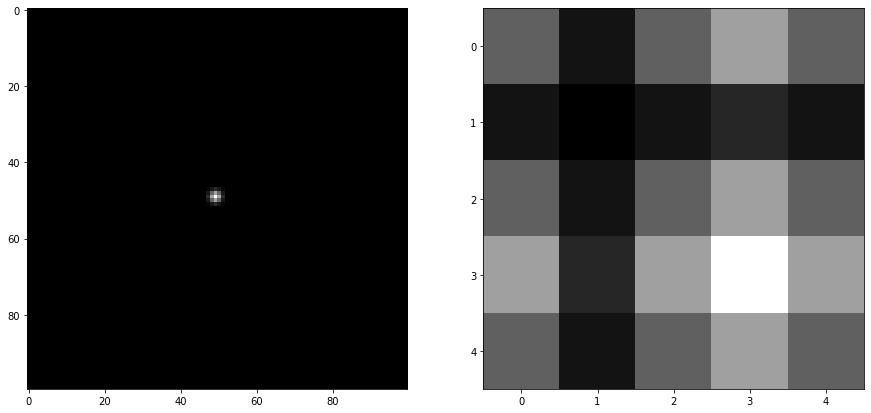

In [54]:
f, axarr = plt.subplots(1,2,figsize=(15,10))
axarr[0].imshow(conv1,cmap='gray')
axarr[1].imshow(conv2,cmap='gray')

### Aplicando relação cruzada

In [55]:
cross1 = cv2.filter2D(I,-1,np.flip(g))
cross2 = cv2.filter2D(g,-1,np.flip(I))

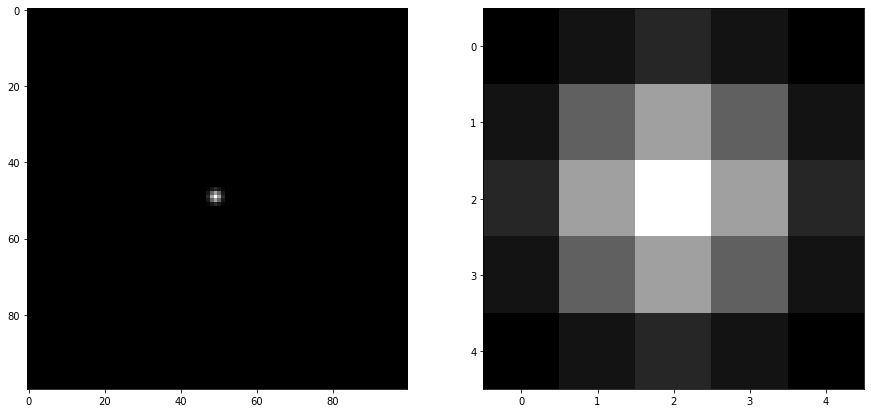

In [56]:
f, axarr = plt.subplots(1,2,figsize=(15,10))
axarr[0].imshow(cross1,cmap='gray')
axarr[1].imshow(cross2,cmap='gray')

# Questão 10

Tamanho original cat:(163,171)
Tamanho original car:(169,243)
Tamanho original dog:(190,234)


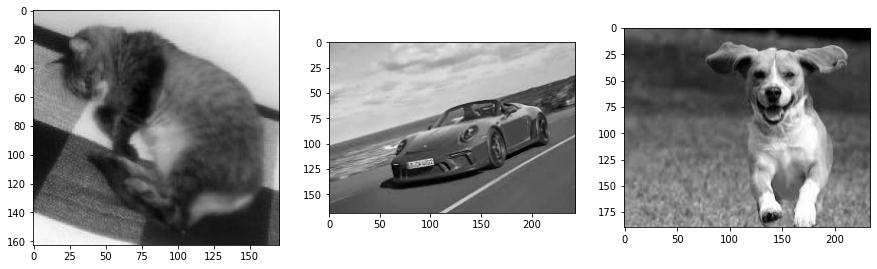

In [57]:
f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(cat,cmap='gray')
axarr[1].imshow(car,cmap='gray')
axarr[2].imshow(dog,cmap='gray')

print('Tamanho original cat:({},{})'.format(cat.shape[0],cat.shape[1]))
print('Tamanho original car:({},{})'.format(car.shape[0],car.shape[1]))
print('Tamanho original dog:({},{})'.format(dog.shape[0],dog.shape[1]))

In [58]:
def reshapeImage(image,factor):
    h = image.shape[0]
    w = image.shape[1]
    
    h *= factor
    w *= factor
    
    result = cv2.resize(image,(int(w),int(h)))
    return result

Tamanho aumentado cat:(652,684)
Tamanho aumentado car:(676,972)
Tamanho aumentado dog:(760,936)


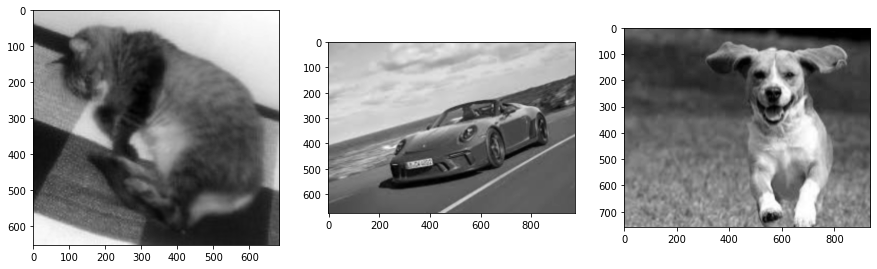

In [59]:
bigger_cat = reshapeImage(cat,4)
bigger_car = reshapeImage(car,4)
bigger_dog = reshapeImage(dog,4)

f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(bigger_cat,cmap='gray')
axarr[1].imshow(bigger_car,cmap='gray')
axarr[2].imshow(bigger_dog,cmap='gray')

print('Tamanho aumentado cat:({},{})'.format(bigger_cat.shape[0],bigger_cat.shape[1]))
print('Tamanho aumentado car:({},{})'.format(bigger_car.shape[0],bigger_car.shape[1]))
print('Tamanho aumentado dog:({},{})'.format(bigger_dog.shape[0],bigger_dog.shape[1]))

Tamanho diminuído cat:(40,42)
Tamanho diminuído car:(42,60)
Tamanho diminuído dog:(47,58)


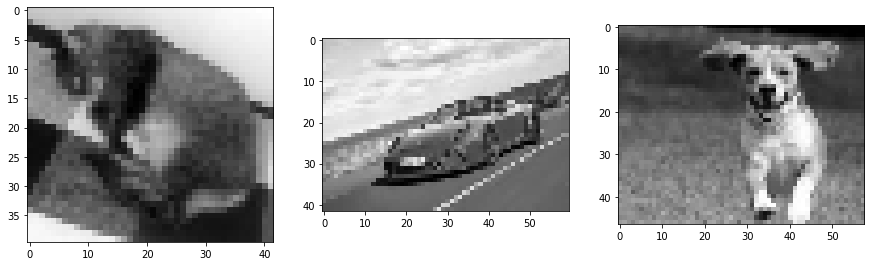

In [60]:
smaller_cat = reshapeImage(cat,1/4)
smaller_car = reshapeImage(car,1/4)
smaller_dog = reshapeImage(dog,1/4)

f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(smaller_cat,cmap='gray')
axarr[1].imshow(smaller_car,cmap='gray')
axarr[2].imshow(smaller_dog,cmap='gray')

print('Tamanho diminuído cat:({},{})'.format(smaller_cat.shape[0],smaller_cat.shape[1]))
print('Tamanho diminuído car:({},{})'.format(smaller_car.shape[0],smaller_car.shape[1]))
print('Tamanho diminuído dog:({},{})'.format(smaller_dog.shape[0],smaller_dog.shape[1]))

# Questão 11